In [1]:
import numpy as np
import popkinmocks as pkm
import matplotlib.pyplot as plt
from conftest import my_three_component_cube

nv=20, mad=0.0009334891770789722
nv=40, mad=0.00020262838466744704
nv=80, mad=7.647139645239331e-05


Text(0, 0.5, 'pdf')

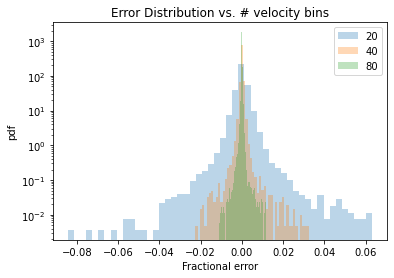

In [2]:
for nv in [20, 40, 80]:
    cube = my_three_component_cube(nv)
    p_tvxz = cube.get_p('tvxz',
                        density=True,
                        light_weighted=False,
                        collapse_cmps=True)
    mix_cmp = pkm.components.Component(cube=cube, p_tvxz=p_tvxz)
    mix_cmp.evaluate_ybar()
    frac_error = 1. - cube.ybar/mix_cmp.ybar
    plt.hist(np.ravel(frac_error), alpha=0.3, label=str(nv), bins=50, density=True)
    mad = np.median(np.abs(frac_error))
    print(f'{nv=}, {mad=}')
plt.gca().legend()
plt.gca().set_yscale('log')
plt.gca().set_title('Error Distribution vs. # velocity bins')
plt.gca().set_xlabel('Fractional error')
plt.gca().set_ylabel('pdf')

The fractional error between datacube signal calculated in two ways:
1. using exact FTs of the normal LOSVDs
2. using FFTs of histogrammed LOSVDs with number of velocity bins = 20, 40 or 80

The error distrubtuion shrinks with better velocity resolution for the FFTs - good!

With `nv=20` the error tails are large - reaching 6%! Although the median absolute error is still <0.1% in this case.

For the purpose of fast unit tests, I don't want to increase `nv` above 20. So let's stick with this and use MAD < 0.1% for comparing the two datacubes.

We only compare a subset of the datacube - let's check the MAD on this subset, 

In [3]:
nv = 20
cube = my_three_component_cube(nv)
p_tvxz = cube.get_p('tvxz',
                    density=True,
                    light_weighted=False,
                    collapse_cmps=True)
mix_cmp = pkm.components.Component(cube=cube, p_tvxz=p_tvxz)
mix_cmp.evaluate_ybar()
frac_error = 1. - cube.ybar/mix_cmp.ybar
np.median(np.abs(frac_error[::100,::3,::2]))

0.0014150828567491835

So use 0.15% as the criterion